<a href="https://colab.research.google.com/github/jorgedevoliveira/ImersaoAIAlura/blob/main/IMERSAO_ALURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalação de depêndencias do Google AI

!pip install -q -U google-generativeai

In [ ]:
# Importando as depêndencias para o código

import pathlib
import textwrap

import PIL.Image

import numpy as np
import pandas as pd

from IPython.display import display
from IPython.display import Markdown

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata




In [ ]:
# Configurando a API Key do GEMINI AI

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
# Listando modelos de AI Disponíveis

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
# Selecionando o modelo gemini-pro-vision (utilizado para interagir com imagens)

model = genai.GenerativeModel(model_name='gemini-pro-vision')


In [ ]:
# Definindo a função que recebe uma string de texto como entrada e retorna
# formatado em Markdown.

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  763k  100  763k    0     0  1541k      0 --:--:-- --:--:-- --:--:-- 1541k


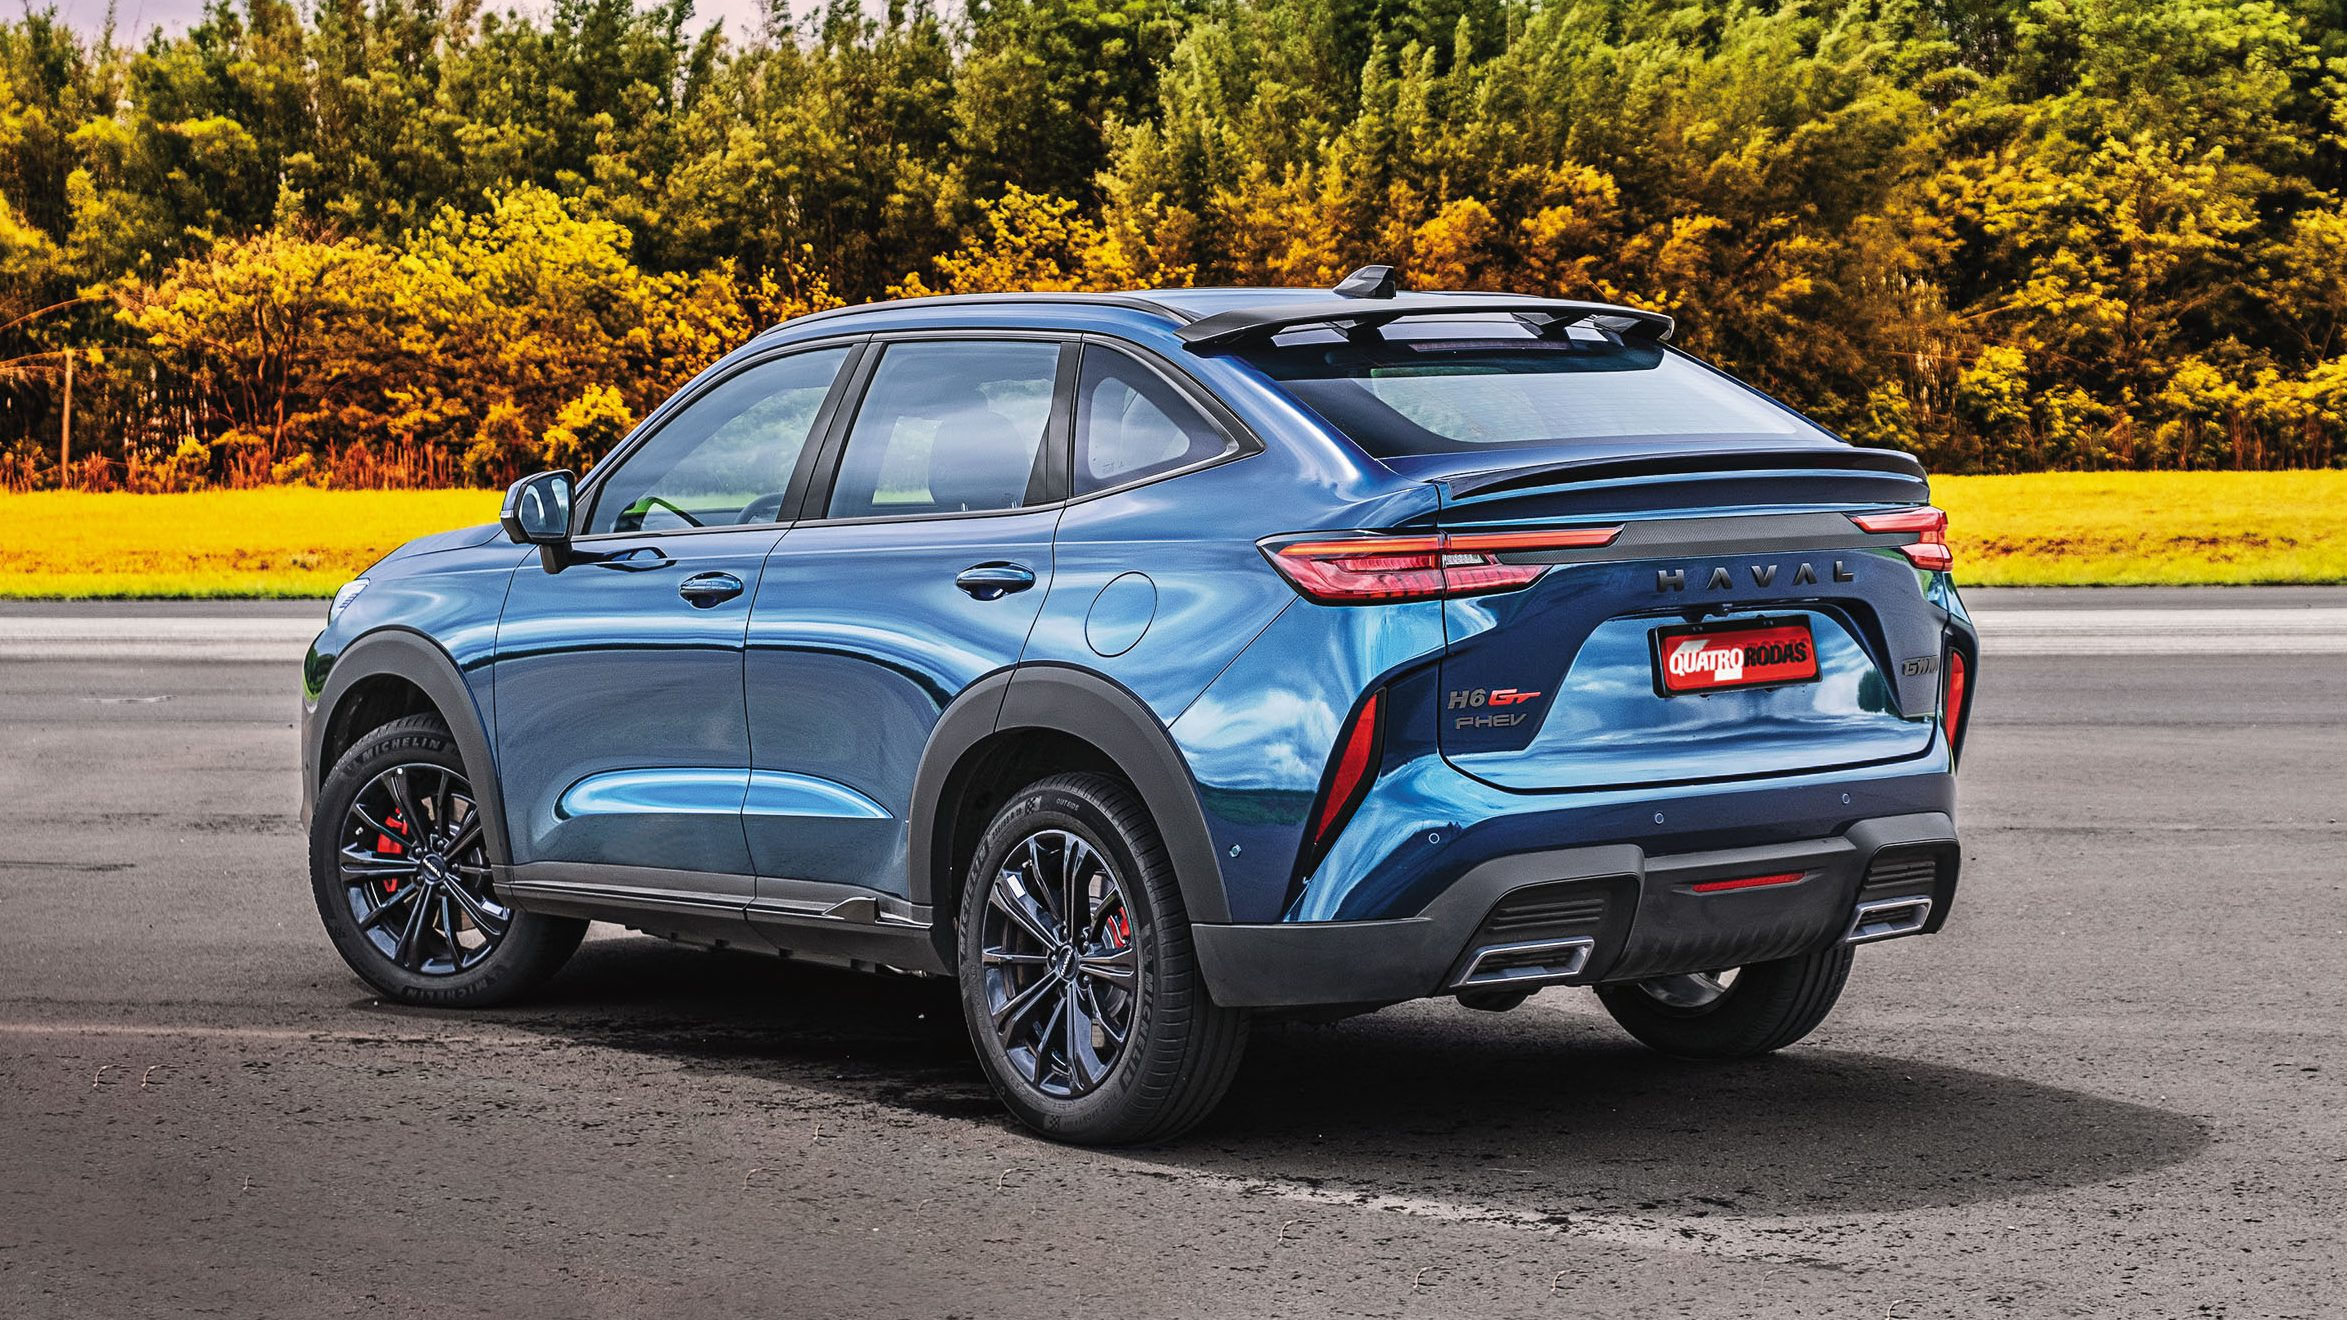

In [ ]:
# realizando o carregamento de uma imagem da web e exibindo em tela

!curl -o image.jpg https://quatrorodas.abril.com.br/wp-content/uploads/2023/01/1FLP0764-e1673017357174.jpg?quality=70&strip=info&w=928&w=636


img = PIL.Image.open('image.jpg')
img


In [ ]:
# Descrevendo a imagem que foi acessada no trecho anterior

response = model.generate_content(["Qual carro é este?", img], stream=True)
response.resolve()

to_markdown(response.text)

>  O carro da foto é o Haval H6 GT PHEV.

In [ ]:
# Selecionando o modelo gemini-pro para interagir com texto e iniciando um chat

model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [ ]:
# Enviando um Prompt em formato de chat

prompt = input("Esperando prompt: ")

while prompt != "sair":
  response = chat.send_message(prompt)
  for message in chat.history:
    display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))
  prompt = input("Esperando prompt: ")


In [ ]:
# Listando modelos de AI de embeded Content Disponíveis

for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


In [ ]:
# Texto de exemplo

title =  "A próxima geração de IA para desenvolvedores e Google Workspace"
sample_text = ("Titulo: A próxima geração de IA para desenvolvedores e Google Workspace"
"\n"
"Artigo completo:\n"
"\n"
"Gemini API & Google Al Studio: Uma maneira acessivel de explorar e criar protótipos com aplicações de IA generativa")

embeddings = genai.embed_content(model="models/embedding-001",
                                 content=sample_text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")

In [ ]:
print(embeddings)

In [ ]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004
